# setup

In [1]:
from pendulum_forces import MagneticPendulumInvSpherical, MagneticPendulumXY
import numpy as np
import sympy as sp
from scipy.constants import g as g_value
from matplotlib import pyplot as plt
from plotting import *

In [2]:
P_XY = MagneticPendulumXY(4)
P_SP = MagneticPendulumInvSpherical(4)

In [3]:
t_max = 100
dt = 0.001

const1_subs = {
    'm': 1,
    'g': g_value,
    'L': g_value,
    'R': 0.5,
    'h': 0.5,
    'b': 0.1,   
}
magnet_strength = 1

magnet_polarity_vals = dict((p.name, magnet_strength) for p in P_XY.polarity_list)
constant_subs = const1_subs | magnet_polarity_vals

L = constant_subs['L']
R = constant_subs['R']

In [4]:
magnet_positions_3D = []
for mag in P_XY.magnet_positions_C:
    mag_pos = [np.float64(mag.dot(base_i).subs(constant_subs)) for base_i in P_XY.coordsystem.C.base_vectors()]
    magnet_positions_3D.append(mag_pos)
magnet_positions_3D

[[0.5, 0.0, -10.30665],
 [0.0, 0.5, -10.30665],
 [-0.5, 0.0, -10.30665],
 [0.0, -0.5, -10.30665]]

In [5]:
def get_trajectory(P, starting_conditions):
    path = P.get_path(starting_conditions, t_max=t_max, dt=dt, **constant_subs)
    trajectory = P.path_to_trajectory(path)
    return path, trajectory

def get_plot(trajectory, view='2D', size=L):
    if view=='2D':
        plot_func = plot_trajectory_2D
    elif view=='3D':
        plot_func = plot_trajectory
    else:
        raise ValueError
    ax = plot_func(trajectory, magnet_positions_3D, L=size)
    return ax

def get_energy(P, path):
    total_energy = sum(P.energy_dict.values()) + P.kinetic_energy()

    inputs = list(P.coordsystem.U) + [sp.Derivative(u, P.coordsystem.t) for u in P.coordsystem.U]
    f = sp.lambdify(inputs, total_energy.E.subs(constant_subs), modules='numpy')
    energy_array = np.array([f(*pos) for pos in path.T])

    ax = plt.figure(figsize=(2, 2)).add_subplot()
    ax.plot(np.arange(0, t_max, dt), energy_array, label='Calculated Energy', zorder=1)
    ax.set_title('calculated energy levels')
    ax.set_xlabel('t')
    return ax

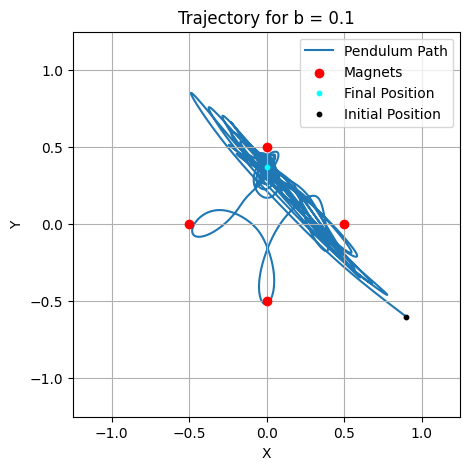

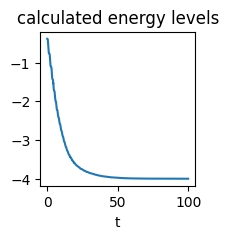

In [6]:
P = P_XY
b = const1_subs['b']

# starting_cond = [L, 0.11, -0.588, 0,0,0]
starting_cond = [0.9, -0.6, -L, 0,0,0]

size_init = 2.5
zlim = (magnet_positions_3D[0][2], -L+0.1)


path, trajectory = get_trajectory(P, starting_cond)
ax = get_plot(trajectory, view='2D', size=size_init)
get_energy(P, path)


# ax.set_title(f'Trajectory with starting position {starting_cond[:2]}')
ax.set_title(f'Trajectory for b = {b}')


# zcentre = (zlim[1] + zlim[0])/2
zsize = zlim[1] - zlim[0]
size = max(zsize, size_init)
ax.set_xlim(-size/2, size/2)
ax.set_ylim(-size/2, size/2)
# ax.set_zlim(zlim[0], zlim[1] + (size - zsize))

# ax.view_init(elev=70, azim=-60)
ax.legend(loc='upper right')

ax.figure.savefig(f'trajectory_damping_{b}.png')

In [7]:
P = P_XY

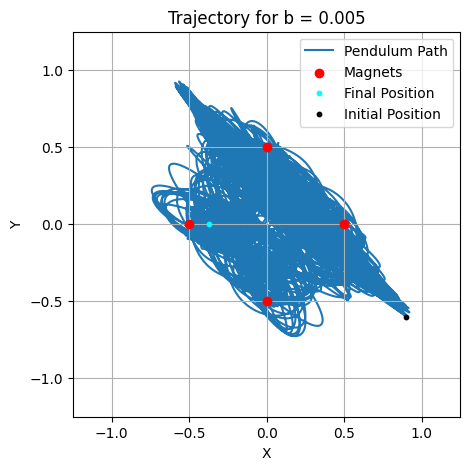

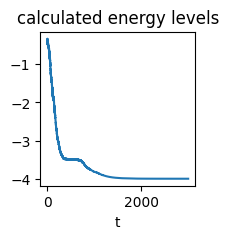

In [15]:
b = 0.005
constant_subs['b'] = b
t_max = 3000
dt = 0.001


magnet_positions_3D = []
for mag in P.magnet_positions_C:
    mag_pos = [np.float64(mag.dot(base_i).subs(constant_subs)) for base_i in P_XY.coordsystem.C.base_vectors()]
    magnet_positions_3D.append(mag_pos)
# magnet_positions_3D

starting_cond = [0.9, -0.6, -L, 0,0,0]

size_init = 2.5
zlim = (magnet_positions_3D[0][2], -L+0.1)


path, trajectory = get_trajectory(P, starting_cond)
ax = get_plot(trajectory, view='2D', size=size_init)
get_energy(P, path)


# ax.set_title(f'Trajectory with starting position {starting_cond[:2]}')
ax.set_title(f'Trajectory for b = {b}')


# zcentre = (zlim[1] + zlim[0])/2
zsize = zlim[1] - zlim[0]
size = max(zsize, size_init)
ax.set_xlim(-size/2, size/2)
ax.set_ylim(-size/2, size/2)
# ax.set_zlim(zlim[0], zlim[1] + (size - zsize))

# ax.view_init(elev=70, azim=-60)
ax.legend(loc='upper right')

ax.figure.savefig(f'trajectory_damping_{b}.png')

t_max = 100
dt = 0.001

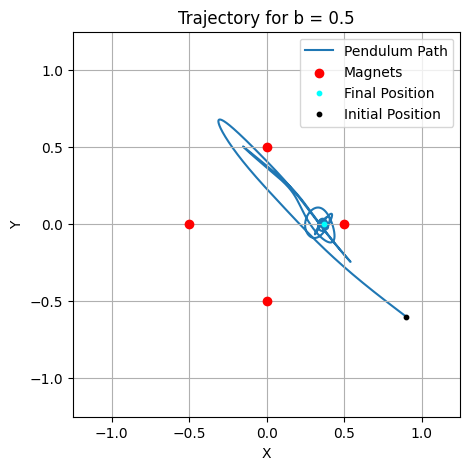

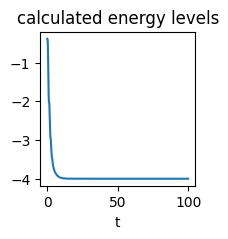

In [8]:
b = 0.5
constant_subs['b'] = b


magnet_positions_3D = []
for mag in P.magnet_positions_C:
    mag_pos = [np.float64(mag.dot(base_i).subs(constant_subs)) for base_i in P_XY.coordsystem.C.base_vectors()]
    magnet_positions_3D.append(mag_pos)
# magnet_positions_3D

starting_cond = [0.9, -0.6, -L, 0,0,0]

size_init = 2.5
zlim = (magnet_positions_3D[0][2], -L+0.1)


path, trajectory = get_trajectory(P, starting_cond)
ax = get_plot(trajectory, view='2D', size=size_init)
get_energy(P, path)


# ax.set_title(f'Trajectory with starting position {starting_cond[:2]}')
ax.set_title(f'Trajectory for b = {b}')


# zcentre = (zlim[1] + zlim[0])/2
zsize = zlim[1] - zlim[0]
size = max(zsize, size_init)
ax.set_xlim(-size/2, size/2)
ax.set_ylim(-size/2, size/2)
# ax.set_zlim(zlim[0], zlim[1] + (size - zsize))

# ax.view_init(elev=70, azim=-60)
ax.legend(loc='upper right')

ax.figure.savefig(f'trajectory_damping_{b}.png')